### Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time.

In [1]:
# import libraries

import pandas as pd

data = pd.read_csv("cohorts.csv")
print(data.head())


         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [2]:
# check if data has null values 

missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [3]:
#check the datatypes of all the columns in the dataset

data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


##### The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format:

In [6]:
# convert "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"], format = "%d/%m/%Y")

In [7]:
# display the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

                      Date    New users  Returning users  Duration Day 1  \
count                   30    30.000000        30.000000       30.000000   
mean   2023-11-08 12:00:00  3418.166667      1352.866667      208.259594   
min    2023-10-25 00:00:00  1929.000000       784.000000       59.047619   
25%    2023-11-01 06:00:00  3069.000000      1131.500000      182.974287   
50%    2023-11-08 12:00:00  3514.500000      1388.000000      206.356554   
75%    2023-11-15 18:00:00  3829.500000      1543.750000      230.671046   
max    2023-11-23 00:00:00  4790.000000      1766.000000      445.872340   
std                    NaN   677.407486       246.793189       64.730830   

       Duration Day 7  
count       30.000000  
mean       136.037157  
min          0.000000  
25%         68.488971  
50%        146.381667  
75%        220.021875  
max        304.350000  
std         96.624319  


#### The descriptive statistics provide the following insights:

New Users: The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.
Returning Users: On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.
Duration Day 1: The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
Duration Day 7: The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.

#### Now, let’s have a look at the trend of the new and returning users over time:


In [8]:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### Now, let’s have a look at the trend of duration over time:

In [9]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### Now, let’s have a look at the correlation between the variables:

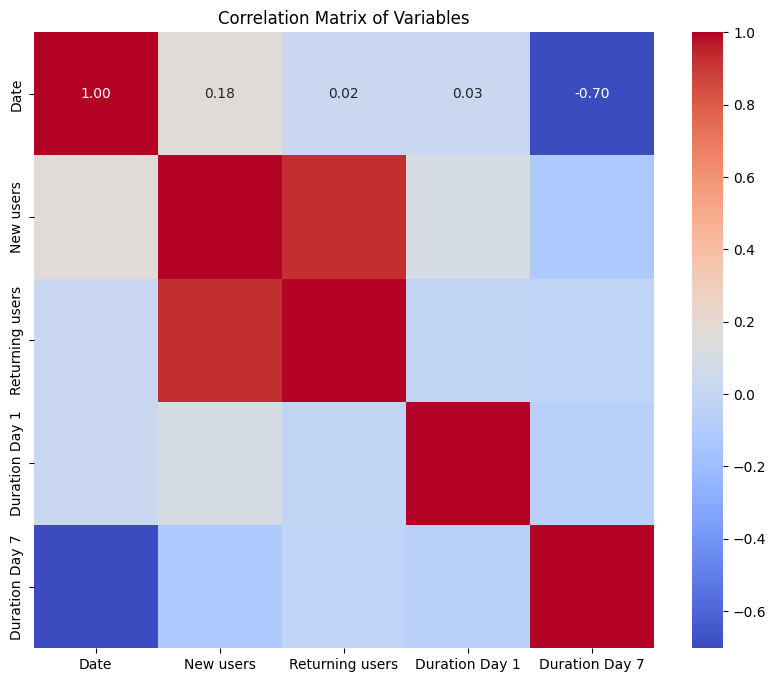

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

#### Here, the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

### For Cohort Analysis, we're going to group our data by each week of the year to create sets of users who joined during the same week. Then, for each of these groups (cohorts), we'll figure out the average number of new users, the average number of users who come back, and also the average time spent on the platform on the first day and the seventh day. Let's begin by organizing our data based on weeks and calculating these average values.

In [11]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


#### Now, let’s have a look at the weekly average of the new and returning users and the duration:

In [12]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

#### Let's make a chart to see how things change each week. Each row will show the average values for a specific week, and each column will represent a different measure:

Average number of new users: This tells us how many new users, on average, join each week.

Average number of returning users: This shows the average count of users who come back in subsequent weeks.

Average duration on Day 1: We'll see how much time, on average, users spend on the platform on their first day.

Average duration on Day 7: This measures the average time users spend on the platform on the seventh day after joining.

This chart will help us quickly grasp patterns and changes in these metrics over the weeks.

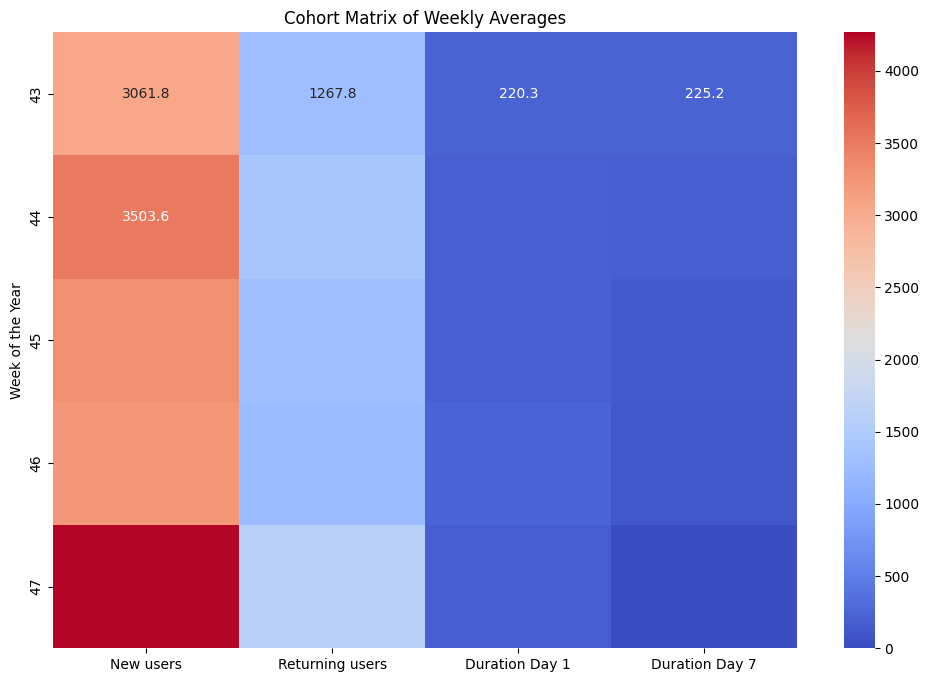

In [13]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

##### The number of new and returning users changes each week, and in Week 47, there was a notable increase in both. The average time users spend on the platform on the first and seventh day differs each week. Interestingly, these durations don't seem to have a consistent relationship with the number of new or returning users. This suggests that there might be other factors affecting how users engage with the platform.

### Summary
Cohort Analysis is a method in data analysis that helps us understand how specific groups of users or customers behave and what characteristics define their actions over time. This technique is valuable for businesses because it provides actionable insights into user behavior, allowing them to make informed decisions based on the behavior patterns of distinct user groups. By organizing and studying users in cohorts, businesses can identify trends, measure performance, and tailor strategies to enhance the overall user experience.